<a href="https://colab.research.google.com/github/yhy0519/Machine_learning_of_R/blob/main/R03_01_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**■ 그룹함수**

       Oracle            vs            R
      1. max                          max
      2. min                          min
      3. sum                          sum
      4. avg                          mean
      5. count                     length(세로)
                                    table(가로)

문제52. 최대 월급을 출력하시오 !

In [5]:
# 1. 워킹 디렉토리를 지정한다.
setwd("/content/data")

# 2. 지정된 워킹 디렉토리를 확인한다.
getwd()

# 3. emp3.csv 를 로드하여 emp 데이터 프레임을 만든다.
emp <- read.csv("emp3.csv")

# 4. 최대월급을 구한다.
max(emp$sal)

[1] "/content/data"

[1] 5000

문제53. 직업이 SALESMAN 인 사원들의 최대월급을 출력하시오 !


In [2]:
result <- emp[ emp$job=="SALESMAN", "sal" ]
result

max(result)

[1] 1250 1600 1500 1250

[1] 1600

In [3]:
# 한줄로 처리하고 싶다면 ?

max( emp[ emp$job=="SALESMAN", "sal" ] )

[1] 1600

문제54. 20번 부서번호인 사원들 중에서의 최소월급을 출력하시오 !


In [5]:
min( emp[ emp$deptno==20, "sal" ] )

[1] 800

문제55. 직업, 직업별 최대월급을 출력하시오 !

SQL>

    select job, max(sal)
       from emp 
       group by job;

R>

In [6]:
aggregate( sal~job, emp, max )

job,sal
<chr>,<int>
ANALYST,3000
CLERK,1300
MANAGER,2975
PRESIDENT,5000
SALESMAN,1600


설명: aggregate( 계산될컬럼~기준될컬럼, 테이블명, 그룹함수명)  
(aggregate는 데이터의 특정 컬럼을 기준으로 통계량을 구해주는 함수)


문제56. 부서번호, 부서번호별 토탈월급을 출력하시오 !

SQL>

    select deptno, sum(sal)
       from emp
       group by deptno;

R>

In [7]:
aggregate( sal~deptno, emp, sum )

deptno,sal
<int>,<int>
10,8750
20,10875
30,9400


문제57. 위에서 출력되고 있는 컬럼명을 한글로 부서번호, 토탈월급으로 변경하시오 !


In [8]:
result <- aggregate( sal~deptno, emp, sum )
names(result) <- c('부서번호', '토탈월급')
result

부서번호,토탈월급
<int>,<int>
10,8750
20,10875
30,9400


문제58. 위의 결과를 다시 출력하는데 토탈월급이 높은것부터 출력하시오 !


In [10]:
result <- aggregate( sal~deptno, emp, sum )
names(result) <- c('부서번호', '토탈월급')
install.packages("doBy")
library(doBy)
orderBy( ~-토탈월급, result)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘lme4’, ‘numDeriv’, ‘pbkrtest’, ‘Deriv’




,부서번호,토탈월급
,<int>,<int>
2,20,10875
3,30,9400
1,10,8750


문제59. 직업, 직업별 인원수를 출력하시오 !

SQL>

    select job, count(empno)
       from emp
       group by job;

R>

In [11]:
result <- aggregate( empno~job, emp, length )
names(result) <- c('직업', '인원수')
result

직업,인원수
<chr>,<int>
ANALYST,2
CLERK,4
MANAGER,3
PRESIDENT,1
SALESMAN,4


문제60. 위의 결과를 다시 출력하는데 인원수가 높은 것부터 출력하시오 !


In [12]:
result <- aggregate( empno~job, emp, length )
names(result) <- c('직업', '인원수')
library(doBy)
orderBy( ~-인원수, result )

,직업,인원수
,<chr>,<int>
2,CLERK,4
5,SALESMAN,4
3,MANAGER,3
1,ANALYST,2
4,PRESIDENT,1


문제61. 직업, 직업별 인원수를 가로로 출력하시오 !


In [13]:
table(emp$job)


  ANALYST     CLERK   MANAGER PRESIDENT  SALESMAN 
        2         4         3         1         4 

문제62. 위의 결과를 원형 그래프로 시각화 하시오 !


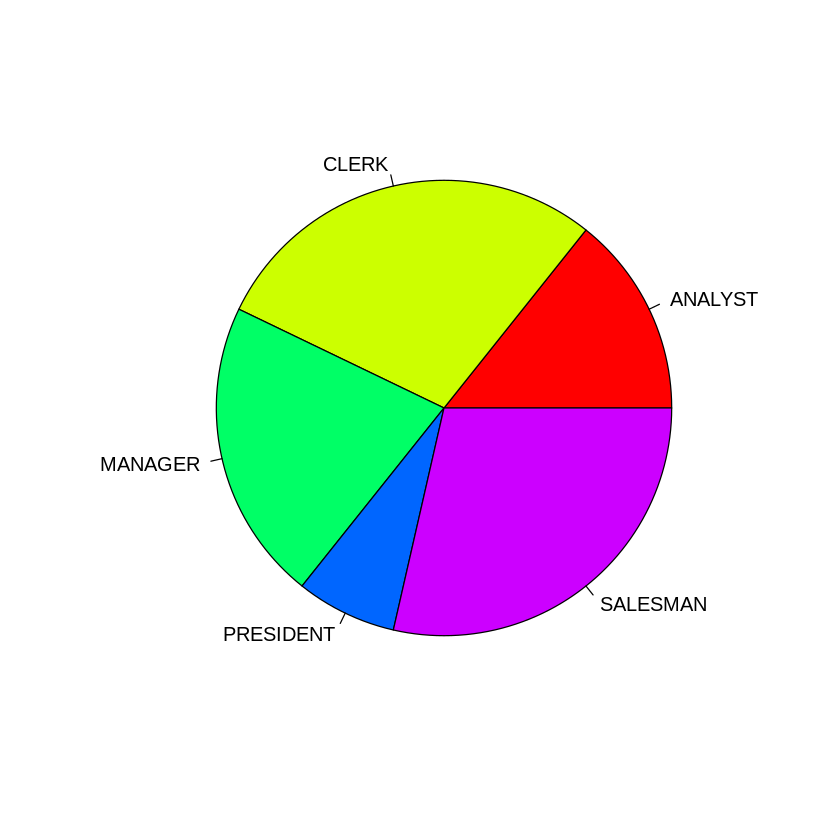

In [14]:
pie(table(emp$job), col=rainbow(5))

문제63. 부서번호, 직업, 부서번호별 직업별 토탈월급을 출력하시오 !

SQL>

    select deptno, job, sum(sal)
       from emp
       group by deptno, job;

R>

In [15]:
aggregate( sal~deptno+job, emp, sum )

deptno,job,sal
<int>,<chr>,<int>
20,ANALYST,6000
10,CLERK,1300
20,CLERK,1900
30,CLERK,950
10,MANAGER,2450
20,MANAGER,2975
30,MANAGER,2850
10,PRESIDENT,5000
30,SALESMAN,5600


문제64. 입사한 년도(4자리), 입사한 년도별 평균월급을 출력하시오 !

SQL>

    select to_char(hiredate, 'RRRR'), avg(sal)
       from emp
       group by to_char(hiredate, 'RRRR');

R>

In [16]:
x <- aggregate( sal~format( as.Date(emp$hiredate), '%Y'), emp, mean )
names(x) <- c("입사한년도", "평균월급")
x

입사한년도,평균월급
<chr>,<dbl>
1980,800.0
1981,2282.5
1982,2150.0
1983,1100.0


문제65. 위의 결과에서 소수점 이하는 안나오게하시오 !


In [17]:
x$평균월급 <- trunc(x$평균월급)
x

입사한년도,평균월급
<chr>,<dbl>
1980,800
1981,2282
1982,2150
1983,1100


설명: x 데이터 프레임의 평균월급의 값의 소수점 이하를 버리고 x 데이터 프레임의 평균월급에 넣는다.

문제66. 머신러닝 때 사용할 유방암 데이터를 R 로 로드하고 전체 건수가 몇건인지 확인하시오 !

책 129페이지에 유방암 데이터에 대한 설명  

    이 데이터는 위스콘신 대학교의 연구원이 기부했으며 유방 종향의 미세침흡인물 디지털 이미지에서 측정한 값이 들어있다.  
    이 값은 디지털 이미지에 존재하는 새포핵의 특성을 나타낸다.  
    569개의 암조직 검사 예시가 들어있으며 각 예시는 32개의 특징을 갖는다.

갑상선 초음파 검사할 때 초음파로 확인할 때 나오는 디지털 이미지 데이터
 1. 반지름
 2. 질감
 3. 둘레
 4. 넓이
 5. 매끄러움
 6. 조밀성
 7. 오목함

In [19]:
wisc <- read.csv("wisc_bc_data.csv")

# 전체 건수 확인
nrow(wisc)

# 컬럼의 개수 확인
ncol(wisc)

# 데이터 프레임 구조 확인
str(wisc)

[1] 569

[1] 32

'data.frame':	569 obs. of  32 variables:
 $ id               : int  87139402 8910251 905520 868871 9012568 906539 925291 87880 862989 89827 ...
 $ diagnosis        : chr  "B" "B" "B" "B" ...
 $ radius_mean      : num  12.3 10.6 11 11.3 15.2 ...
 $ texture_mean     : num  12.4 18.9 16.8 13.4 13.2 ...
 $ perimeter_mean   : num  78.8 69.3 70.9 73 97.7 ...
 $ area_mean        : num  464 346 373 385 712 ...
 $ smoothness_mean  : num  0.1028 0.0969 0.1077 0.1164 0.0796 ...
 $ compactness_mean : num  0.0698 0.1147 0.078 0.1136 0.0693 ...
 $ concavity_mean   : num  0.0399 0.0639 0.0305 0.0464 0.0339 ...
 $ points_mean      : num  0.037 0.0264 0.0248 0.048 0.0266 ...
 $ symmetry_mean    : num  0.196 0.192 0.171 0.177 0.172 ...
 $ dimension_mean   : num  0.0595 0.0649 0.0634 0.0607 0.0554 ...
 $ radius_se        : num  0.236 0.451 0.197 0.338 0.178 ...
 $ texture_se       : num  0.666 1.197 1.387 1.343 0.412 ...
 $ perimeter_se     : num  1.67 3.43 1.34 1.85 1.34 ...
 $ area_se          : num  1

설명: diagnosis 만 문자이고 나머지는 다 숫자인데 diagnosis 가 유방암 환자가 양성(B) 인지 악성(M) 인지를 나타내는
라벨(정답) 컬럼입니다. 종속변수 입니다.

문제67. 유방암 데이터에서 양성 환자가 몇명이고 악성 환자가 몇명인지 확인하시오 ~


In [20]:
# 세로로 출력
aggregate( id~diagnosis, wisc, length)

diagnosis,id
<chr>,<int>
B,357
M,212


In [21]:
# 가로로 출력
table(wisc$diagnosis)


  B   M 
357 212 

문제68. 위의 결과를 원형 그래프로 시각화 하시오 !


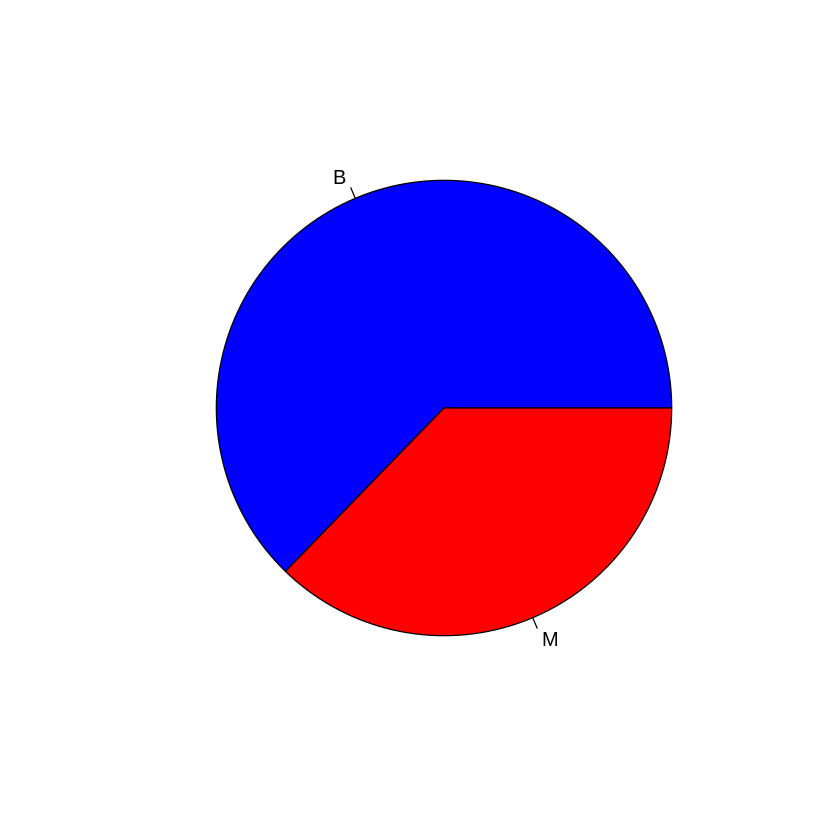

In [22]:
pie( table(wisc$diagnosis), col=c('blue','red') )

문제69. 직업, 직업별 토탈월급을 가로로 출력하시오 !

In [23]:
# 세로로 출력
aggregate( sal~job, emp, sum )

job,sal
<chr>,<int>
ANALYST,6000
CLERK,4150
MANAGER,8275
PRESIDENT,5000
SALESMAN,5600


In [25]:
# 가로로 출력
tapply( emp$sal, emp$job , sum )

ANALYST     CLERK   MANAGER PRESIDENT  SALESMAN 
     6000      4150      8275      5000      5600

R studio 결과

      ANALYST     CLERK   MANAGER PRESIDENT  SALESMAN 
         6000       4150     8275      5000      5600 

문제70. 위의 결과를 막대그래프로 시각화 하시오 !

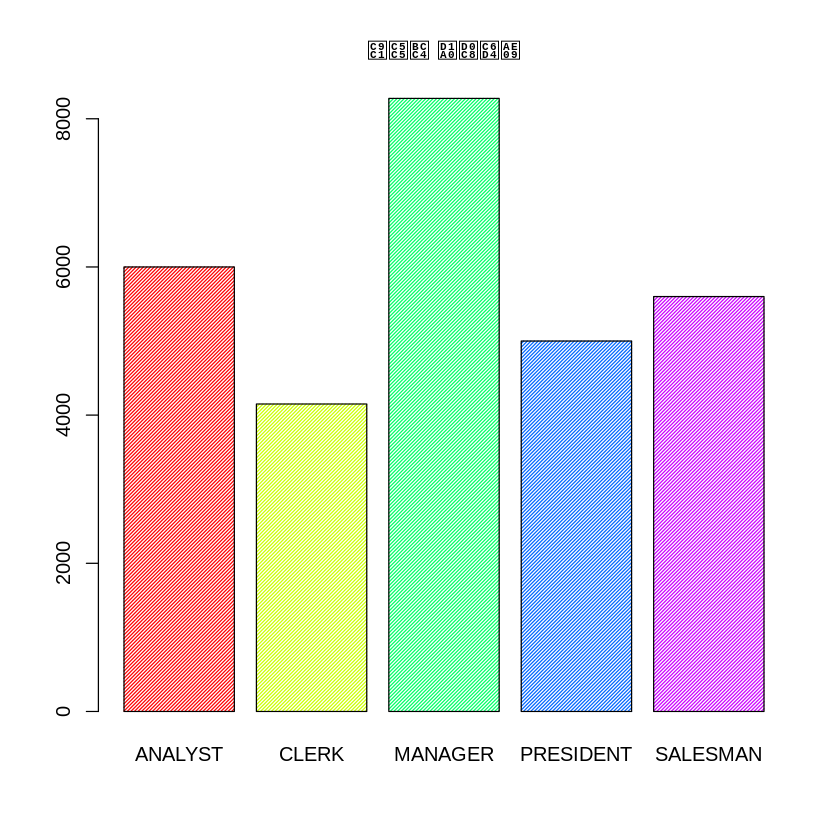

In [26]:
x <- tapply( emp$sal, emp$job , sum )
barplot( x, main='직업별 토탈월급', col=rainbow(5), density=50 )   # density : 투명도

문제71. 입사한 년도(4자리), 입사한 년도별 토탈월급을 출력하시오 !

In [27]:
# 세로로 출력
aggregate( sal~format( as.Date(emp$hiredat), '%Y'), emp, sum)

"format(as.Date(emp$hiredat), ""%Y"")",sal
<chr>,<int>
1980,800
1981,22825
1982,4300
1983,1100


In [28]:
# 가로로 출력
tapply(emp$sal, format( as.Date(emp$hiredate), '%Y'), sum)

1980  1981  1982  1983 
  800 22825  4300  1100

 R studio 결과

     1980   1981   1982   1983 
      800  22825   4300   1100 

문제72. 위의 결과를 막대그래프로 시각화 하시오 !

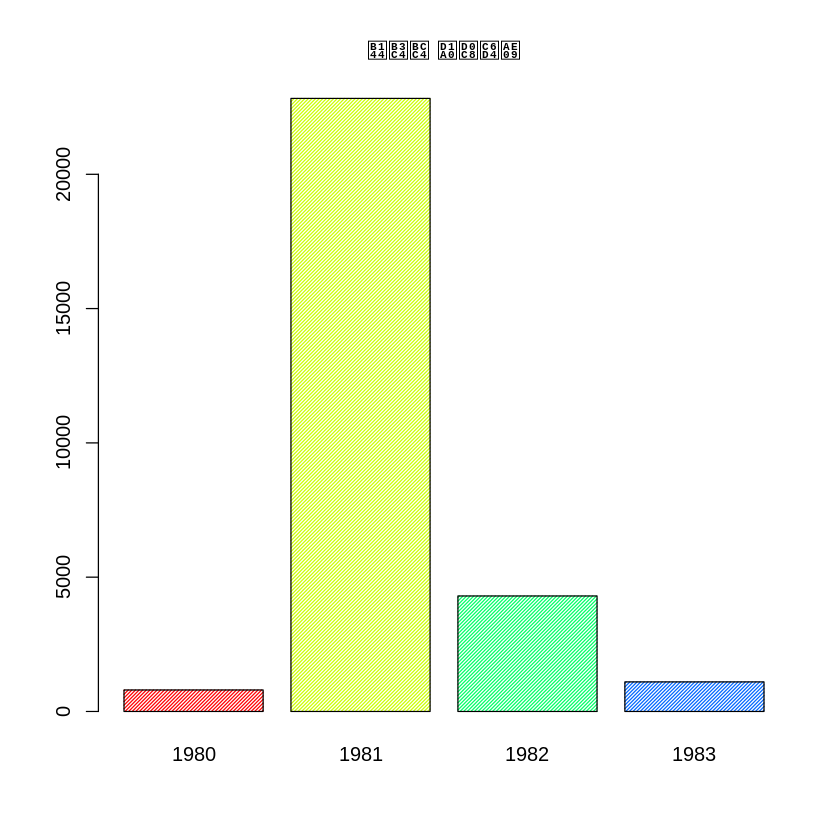

In [29]:
x <- tapply( emp$sal, format( as.Date(emp$hiredate), '%Y') , sum )
barplot( x, main="년도별 토탈월급", col=rainbow(5), density=50 )

문제73. 아래의 SQL 의 결과를 R 로 구현하시오 !

SQL>

    select job, sum( decode(deptno, 10, sal) ) as "10",
                  sum( decode(deptno, 20, sal) ) as "20",
                  sum( decode(deptno, 30, sal) ) as "30",
       from emp
       group by job;

R>

In [30]:
attach(emp)
tapply( sal, list(job, deptno), sum)

,10,20,30
ANALYST,NA,6000,NA
CLERK,1300,1900,950
MANAGER,2450,2975,2850
PRESIDENT,5000,NA,NA
SALESMAN,NA,NA,5600


    설명: attach(emp) 를 사용했기 때문에 emp$sal, emp$job, emp$deptno 라고 안쓰고 sal, job, deptno 로만 작성할 수 있습니다.  
	(attach : 데이터를 R 검색 경로에 추가하여 변수명으로 바로 접근할 수 있게 한다.)


문제74. 위의 결과의 NA 를 숫자 0으로 출력되게하시오 !

In [31]:
attach(emp)
x <- tapply( sal, list(job, deptno), sum)
x[ is.na(x) ] <- 0
x

The following objects are masked from emp (pos = 3):

    comm, deptno, empno, ename, hiredate, index, job, mgr, sal




,10,20,30
ANALYST,0,6000,0
CLERK,1300,1900,950
MANAGER,2450,2975,2850
PRESIDENT,5000,0,0
SALESMAN,0,0,5600


설명: list(job, deptno) 를 써서 직업별 부서번호별 집계결과를 출력

문제75. 위의 결과에서 컬럼명만 출력하고 로우명만 출력하시오


In [32]:
colnames(x)

[1] "10" "20" "30"

In [33]:
rownames(x)

[1] "ANALYST"   "CLERK"     "MANAGER"   "PRESIDENT" "SALESMAN"

문제76. 위의 결과 데이터를 막대 그래프로 시각화 하시오 !

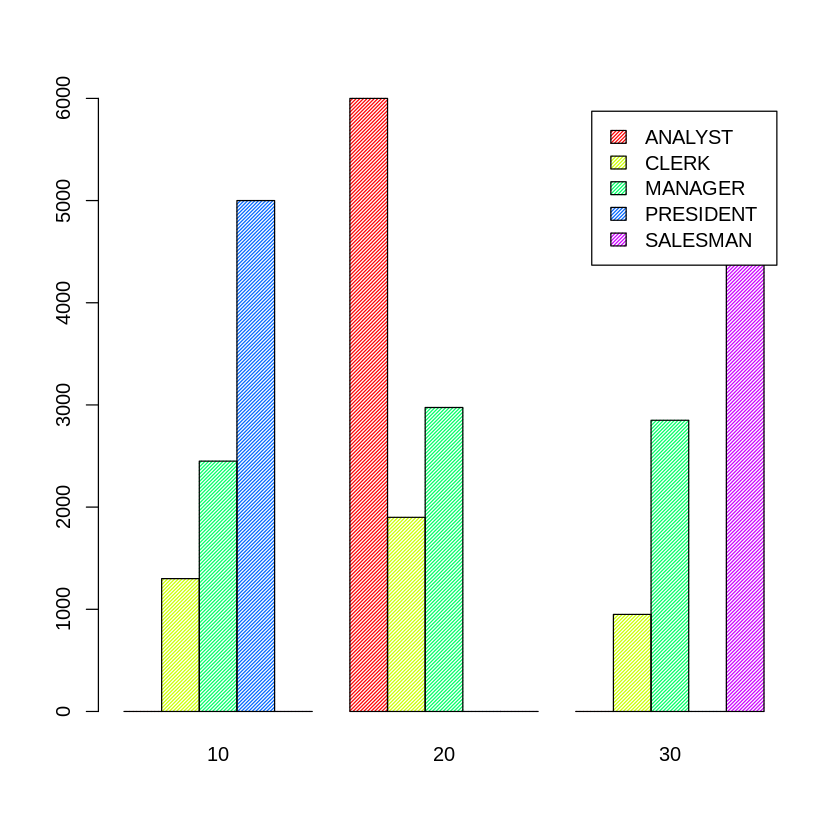

In [34]:
barplot( x,  col=rainbow(5), legend=rownames(x), beside=T, density=50) 

설명:  legend 는 그래프의 설명 박스입니다. beside=T 로 해야 직업별로 각각 막대그래프가 그려집니다.

문제77. 입사한 년도(4자리), 입사한 년도별 직업별 토탈월급을 출력하시오 !


In [35]:
tapply( emp$sal,  list( format( as.Date(emp$hiredate), '%Y'), emp$job), sum )

,ANALYST,CLERK,MANAGER,PRESIDENT,SALESMAN
1980,NA,800,NA,NA,NA
1981,3000,950,8275,5000,5600
1982,3000,1300,NA,NA,NA
1983,NA,1100,NA,NA,NA


문제78. 위의 결과에서 NA 를 0 으로 출력되게 하시오 !


In [36]:
x <- tapply( emp$sal,  list( format( as.Date(emp$hiredate), '%Y'), emp$job), sum )
x [ is.na(x) ] <- 0
x  

,ANALYST,CLERK,MANAGER,PRESIDENT,SALESMAN
1980,0,800,0,0,0
1981,3000,950,8275,5000,5600
1982,3000,1300,0,0,0
1983,0,1100,0,0,0


문제79. 위의 결과를 막대 그래프로 그리시오 ~


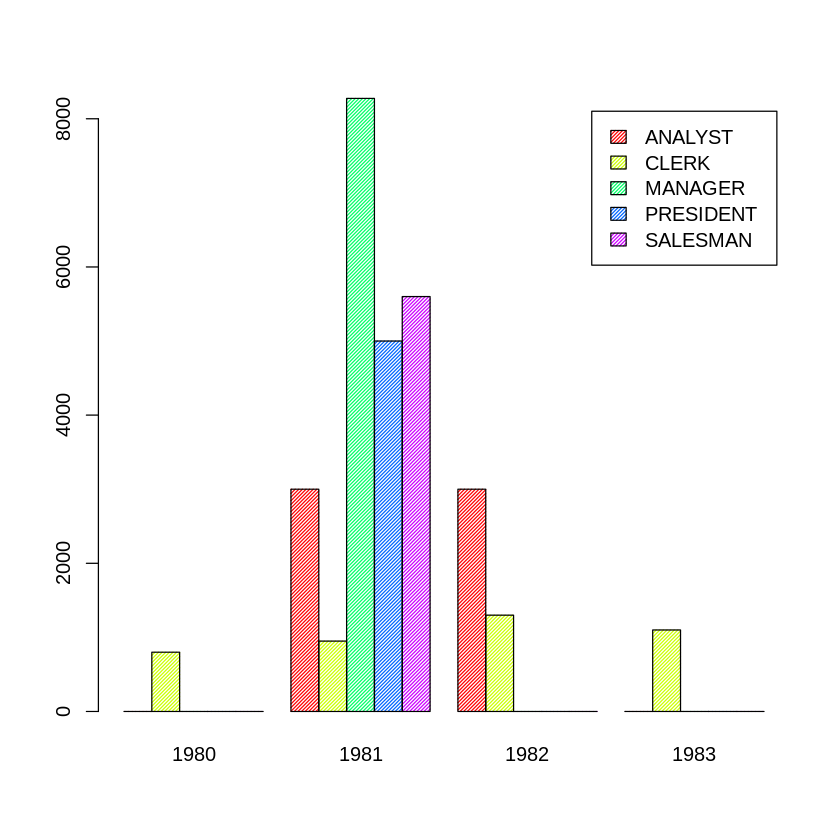

In [37]:
x <- tapply( emp$sal,  list(  emp$job, format( as.Date(emp$hiredate), '%Y')), sum )
x [ is.na(x) ] <- 0
barplot( x,  col=rainbow(5), legend=rownames(x), beside=T, density=50) 

문제80. 입사한 년도(4자리)를 막대 그래프의 x 축으로 구성하고 막대 그래프의 y 축을  부서번호의 평균월급으로 구성 되게 하는데 입사한 년도별로 부서번호 10, 20, 30번이 각각 그려지게하시오~ 


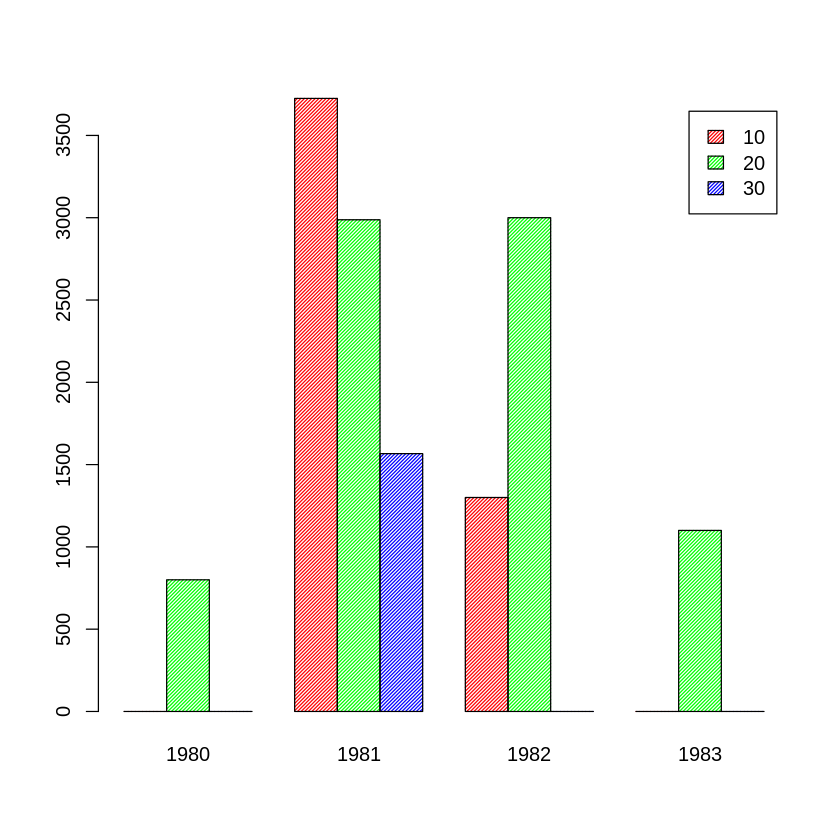

In [38]:
x <- tapply( emp$sal,  list(  emp$deptno, format( as.Date(emp$hiredate), '%Y')), mean )
x [ is.na(x) ] <- 0
barplot( x,  col=rainbow(3), legend=rownames(x), beside=T, density=50) 

문제81. 직업과 직업별 토탈월급을 가지고 원형(pie) 그래프를 그리시오 !


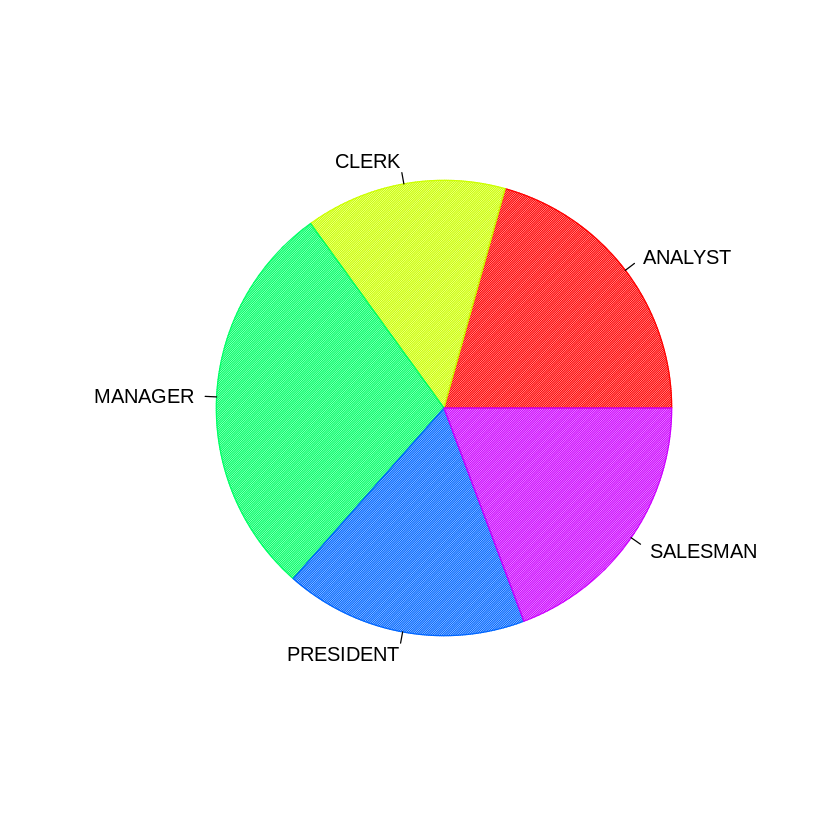

In [41]:
x <- tapply( emp$sal, emp$job, sum )
pie(x, col=rainbow(5), density=80)

문제82. 위의 그래프를 3D 로 그리시오 ~

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



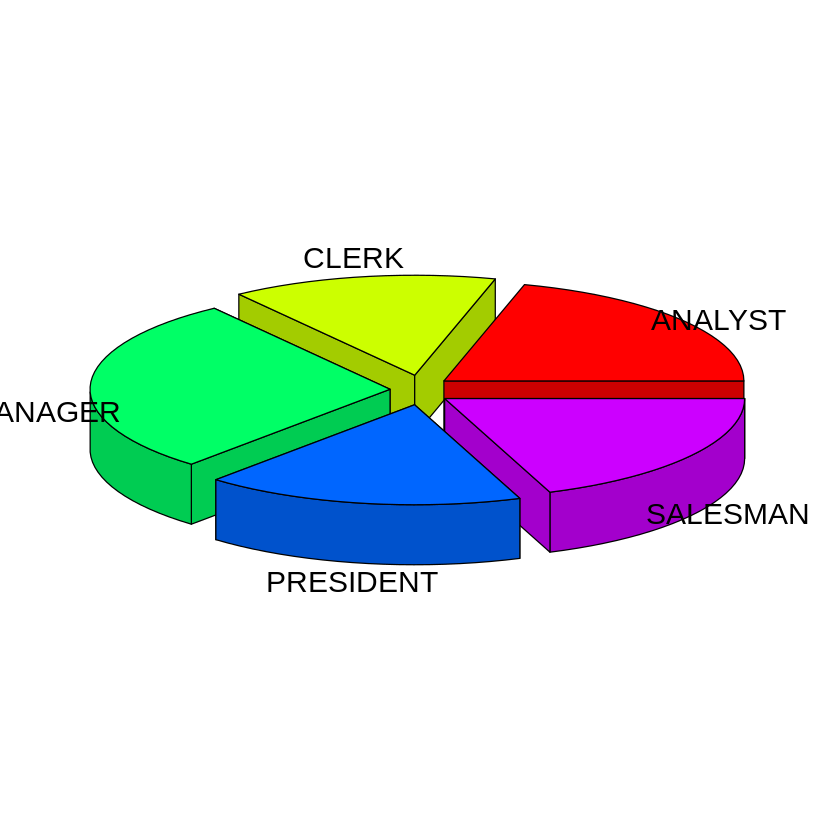

In [42]:
install.packages("plotrix")
library( plotrix )

x <- tapply( emp$sal, emp$job, sum)
pie3D( x, explode=0.1, labels=rownames(x) )

설명: explode 는 벌어짐 정도입니다.

문제83. 위의 그래프의 결과에 직업 옆에 비율도 같이 출력되게하시오 !


In [45]:
# 직업별 토탈월급을 가로로 출력
x <- tapply( emp$sal, emp$job, sum)
x

ANALYST     CLERK   MANAGER PRESIDENT  SALESMAN 
     6000      4150      8275      5000      5600

In [46]:
# 직업별 토탈월급을 세로로 출력
x2 <- aggregate( sal~job, emp, sum)
x2

job,sal
<chr>,<int>
ANALYST,6000
CLERK,4150
MANAGER,8275
PRESIDENT,5000
SALESMAN,5600


In [47]:
# 전체 월급중에 비율값 출력
pct <- round( x2$sal / sum(emp$sal) * 100, 1 )
pct

[1] 20.7 14.3 28.5 17.2 19.3

In [48]:
# 라벨값 만들기
job_label <- paste( x2$job, ':', pct, '%' )
job_label

[1] "ANALYST : 20.7 %"   "CLERK : 14.3 %"     "MANAGER : 28.5 %"  
[4] "PRESIDENT : 17.2 %" "SALESMAN : 19.3 %"

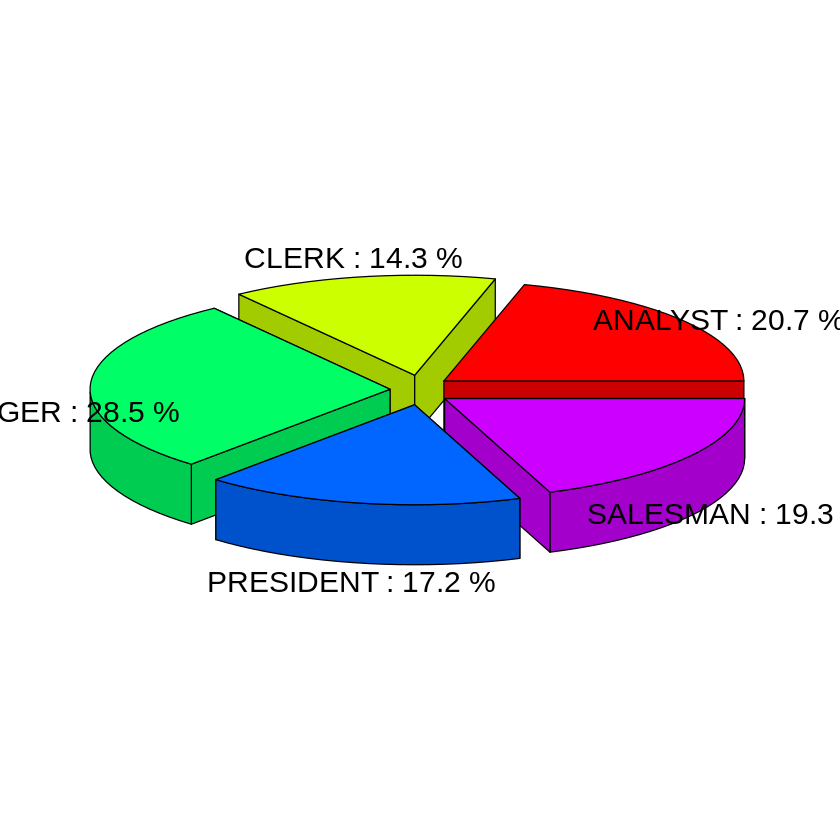

In [49]:
# 3D 로 원형 그래프 그리기
pie3D( x, explode=0.1, labels=job_label )

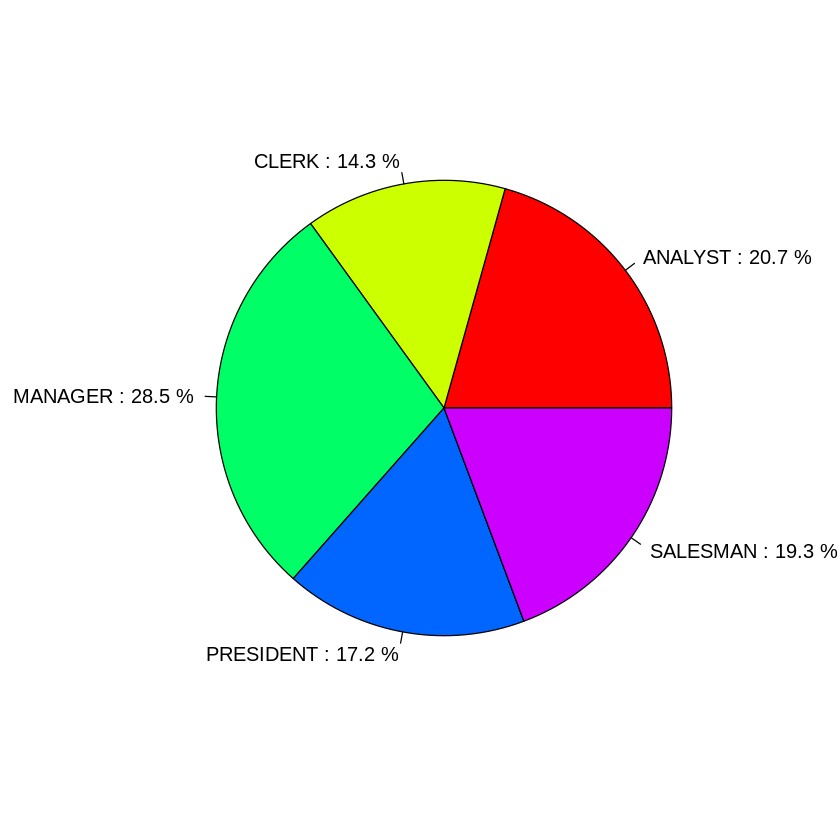

In [51]:
# 그냥 원형 그래프 그리기
pie( x, labels=job_label, col=rainbow(5) )

문제84. 유방암 데이터의 diagnosis 의 양성과 악성의 비율을 원형 그래프로 그리시오 ~


[1] 62.7 37.3

[1] "B : 62.7 %" "M : 37.3 %"

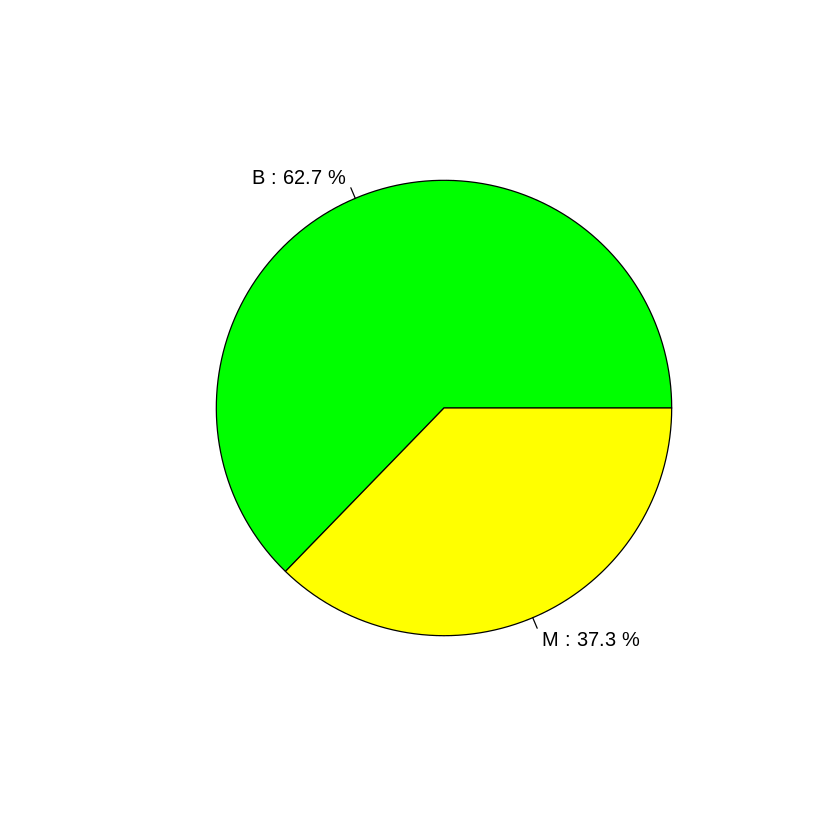

In [54]:
wisc <- read.csv("wisc_bc_data.csv")

x <- table(wisc$diagnosis)
x2 <- aggregate( id~diagnosis, wisc, length)

pct <- round( x2$id / sum(x2$id) * 100, 1 )
pct

w_label <- paste( x2$diagnosis ,':', pct, '%' )
w_label

pie( x, col=c('green', 'yellow'), label=w_label )

설명: 그래프를 그릴때는 가로로 출력되는 결과 데이터를 가지고 그려야 합니다.  
	비율을 나타내는 라벨을 만들때는 세로로 출력되는 결과 데이터를 가지고 만듭니다.

**■ SQL 과 R 비교(Join)**

       Oracle           vs            R
      equi join                     
    non equi join                   merge
      outer join
       self join


dept.csv 를 내려받아 dept 라는 변수에 로드하시오 !

In [4]:
dept <- read.csv("dept.csv")
dept

deptno,dname,loc
<int>,<chr>,<chr>
10,ACCOUNTING,NEW YORK
20,RESEARCH,DALLAS
30,SALES,CHICAGO
40,OPERATIONS,BOSTON


문제85. 이름과 부서위치를 출력하시오 !

SQL>

    select e.ename, d.loc
       from emp e, dept d
       where e.deptno = d.deptno;

R>

In [57]:
# emp 와 dept 를 조인하는데 deptno 에 의해서 조인해라
merge( emp, dept, by="deptno" )

deptno,index,empno,ename,job,mgr,hiredate,sal,comm,dname,loc
<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>
10,1,7839,KING,PRESIDENT,NA,1981-11-17 0:00,5000,NA,ACCOUNTING,NEW YORK
10,14,7934,MILLER,CLERK,7782,1982-01-11 0:00,1300,NA,ACCOUNTING,NEW YORK
10,3,7782,CLARK,MANAGER,7839,1981-05-09 0:00,2450,NA,ACCOUNTING,NEW YORK
20,4,7566,JONES,MANAGER,7839,1981-04-01 0:00,2975,NA,RESEARCH,DALLAS
20,11,7369,SMITH,CLERK,7902,1980-12-09 0:00,800,NA,RESEARCH,DALLAS
20,12,7788,SCOTT,ANALYST,7566,1982-12-22 0:00,3000,NA,RESEARCH,DALLAS
20,13,7876,ADAMS,CLERK,7788,1983-01-15 0:00,1100,NA,RESEARCH,DALLAS
20,10,7902,FORD,ANALYST,7566,1981-12-11 0:00,3000,NA,RESEARCH,DALLAS
30,8,7900,JAMES,CLERK,7698,1981-12-11 0:00,950,NA,SALES,CHICAGO


In [58]:
# 이름과 부서위치 출력
x <- merge( emp, dept, by="deptno" )
x[, c("ename", "loc") ]

ename,loc
<chr>,<chr>
KING,NEW YORK
MILLER,NEW YORK
CLARK,NEW YORK
JONES,DALLAS
SMITH,DALLAS
SCOTT,DALLAS
ADAMS,DALLAS
FORD,DALLAS
JAMES,CHICAGO


설명: x 데이터 프레임에서 ename 과 loc 만 출력

문제86. 부서위치가 DALLAS 인 사원들의 이름과 부서위치를 출력하시오 !

In [59]:
x <- merge( emp, dept, by="deptno" )
x[ x$loc=="DALLAS", c("ename", "loc") ]

,ename,loc
,<chr>,<chr>
4,JONES,DALLAS
5,SMITH,DALLAS
6,SCOTT,DALLAS
7,ADAMS,DALLAS
8,FORD,DALLAS


문제87. 커미션이 NA 인 사원들의 이름과 부서위치와 커미션을 출력하시오 !


In [60]:
x <- merge( emp, dept, by="deptno" )
x[ is.na(x$comm), c("ename", "loc", "comm") ]

,ename,loc,comm
,<chr>,<chr>,<int>
1,KING,NEW YORK,NA
2,MILLER,NEW YORK,NA
3,CLARK,NEW YORK,NA
4,JONES,DALLAS,NA
5,SMITH,DALLAS,NA
6,SCOTT,DALLAS,NA
7,ADAMS,DALLAS,NA
8,FORD,DALLAS,NA
9,JAMES,CHICAGO,NA


문제88. outer join 으로 이름과 부서위치를 출력하는데 아래의 SQL 과 동일한 결과가
	   출력되게하시오 !

SQL>

    select e.ename, d.loc
       from emp e, dept d
       where e.deptno (+)= d.deptno;

R>

In [61]:
x <- merge( emp, dept, by="deptno", all.y=T)
#           ↑    ↑
#           x     y

x[  , c("ename", "loc") ]

ename,loc
<chr>,<chr>
KING,NEW YORK
MILLER,NEW YORK
CLARK,NEW YORK
JONES,DALLAS
SMITH,DALLAS
SCOTT,DALLAS
ADAMS,DALLAS
FORD,DALLAS
JAMES,CHICAGO


설명: all.y=T 는 dept 테이블 쪽에 데이터가 모두 나오게 해라 라는 옵션.


In [62]:
x <- merge( emp, dept, by="deptno", all.y=T)
x

deptno,index,empno,ename,job,mgr,hiredate,sal,comm,dname,loc
<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>
10,1,7839,KING,PRESIDENT,NA,1981-11-17 0:00,5000,NA,ACCOUNTING,NEW YORK
10,14,7934,MILLER,CLERK,7782,1982-01-11 0:00,1300,NA,ACCOUNTING,NEW YORK
10,3,7782,CLARK,MANAGER,7839,1981-05-09 0:00,2450,NA,ACCOUNTING,NEW YORK
20,4,7566,JONES,MANAGER,7839,1981-04-01 0:00,2975,NA,RESEARCH,DALLAS
20,11,7369,SMITH,CLERK,7902,1980-12-09 0:00,800,NA,RESEARCH,DALLAS
20,12,7788,SCOTT,ANALYST,7566,1982-12-22 0:00,3000,NA,RESEARCH,DALLAS
20,13,7876,ADAMS,CLERK,7788,1983-01-15 0:00,1100,NA,RESEARCH,DALLAS
20,10,7902,FORD,ANALYST,7566,1981-12-11 0:00,3000,NA,RESEARCH,DALLAS
30,8,7900,JAMES,CLERK,7698,1981-12-11 0:00,950,NA,SALES,CHICAGO


문제89. 아래의 SQL 의 결과를 R 로 구현하시오

SQL>

    select e.ename, d.loc
       from emp e, dept d
       where e.deptno = d.deptno (+);

R>

In [63]:
x <- merge( emp, dept, by="deptno", all.x=T)
x[  , c("ename", "loc") ]

ename,loc
<chr>,<chr>
KING,NEW YORK
MILLER,NEW YORK
CLARK,NEW YORK
JONES,DALLAS
SMITH,DALLAS
SCOTT,DALLAS
ADAMS,DALLAS
FORD,DALLAS
JAMES,CHICAGO


문제90. 아래의 결과를 R 로 구현하시오 !

SQL>

    select e.ename, d.loc
       from emp e full outer join dept d
       on (e.deptno = d.deptno);

R>

In [64]:
x <- merge( emp, dept, by="deptno", all=T)
x[  , c("ename", "loc") ]

ename,loc
<chr>,<chr>
KING,NEW YORK
MILLER,NEW YORK
CLARK,NEW YORK
JONES,DALLAS
SMITH,DALLAS
SCOTT,DALLAS
ADAMS,DALLAS
FORD,DALLAS
JAMES,CHICAGO


문제91. (self join) 이름을 출력하고 그 옆에 자기의 직속상사의 이름을 출력하시오 !

SQL>

    select 사원.ename, 관리자.ename,
       from emp 사원, emp 관리자
       where 사원.mgr = 관리자.empno;

R>

In [65]:
x <- merge( emp, emp, by.x="mgr", by.y="empno")
#           ↑    ↑
#           x      y
x[  , c("ename.x", "ename.y") ]

ename.x,ename.y
<chr>,<chr>
FORD,JONES
SCOTT,JONES
MARTIN,BLAKE
ALLEN,BLAKE
TURNER,BLAKE
JAMES,BLAKE
WARD,BLAKE
MILLER,CLARK
ADAMS,SCOTT


문제92. 위의 결과를 다시 출력하는데 자기의 월급이 자기의 직속상사의 월급보다
	    더 큰 사원들만 출력하시오 !

In [66]:
x[ x$sal.x > x$sal.y , c("ename.x", "ename.y") ]

,ename.x,ename.y
,<chr>,<chr>
1,FORD,JONES
2,SCOTT,JONES


문제93. 위의 결과 데이터인 사원이름과 직속상사의 이름을 출력하는 데이터를 가지고 사원 테이블의 조직도를 그리시오 ~


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ename.x,ename.y
<chr>,<chr>
FORD,JONES
SCOTT,JONES
MARTIN,BLAKE
ALLEN,BLAKE
TURNER,BLAKE
JAMES,BLAKE
WARD,BLAKE
MILLER,CLARK
ADAMS,SCOTT


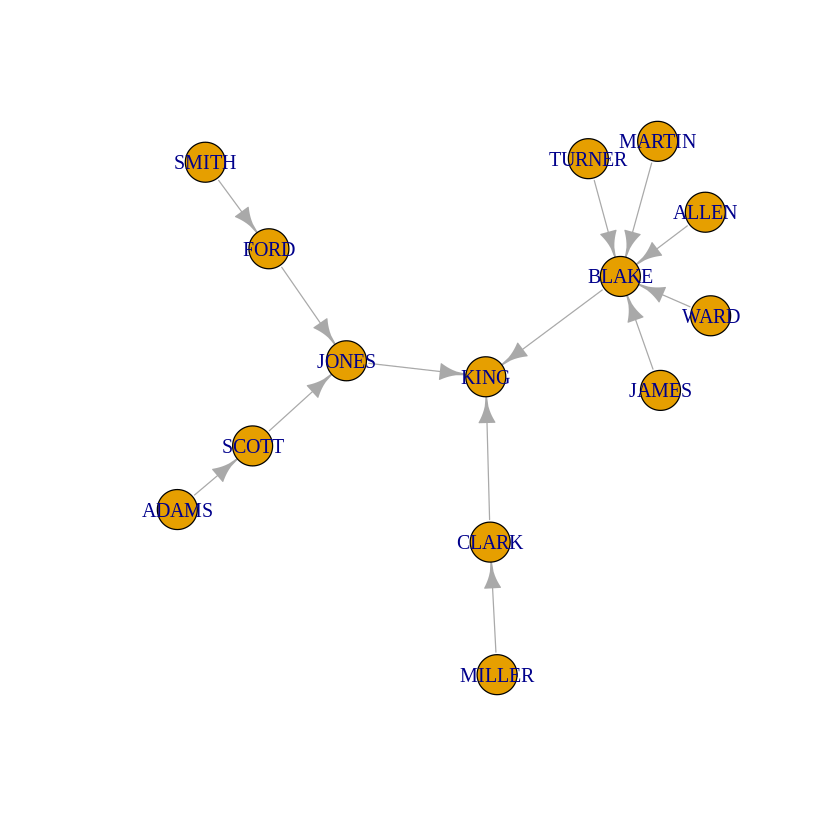

In [6]:
install.packages("igraph")
library( igraph )

x <- merge( emp, emp, by.x="mgr", by.y="empno" )
a <- x[ , c("ename.x", "ename.y") ]
a
b <- graph.data.frame(a, directed=T)
plot(b)

문제94. 위의 그래프를 구글의 googleVis 를 이용해서 시각화 하시오 !


In [ ]:
install.packages("googleVis")
library(googleVis)

a <- merge( emp, emp, by.x="empno", by.y="mgr", all.y=T)
org <- gvisOrgChart(a, idvar="ename.y", parentvar="ename.x",
        options=list(width=600, height=250, size='middle', allowCollapse=T) )
plot(org)

R Studio 결과
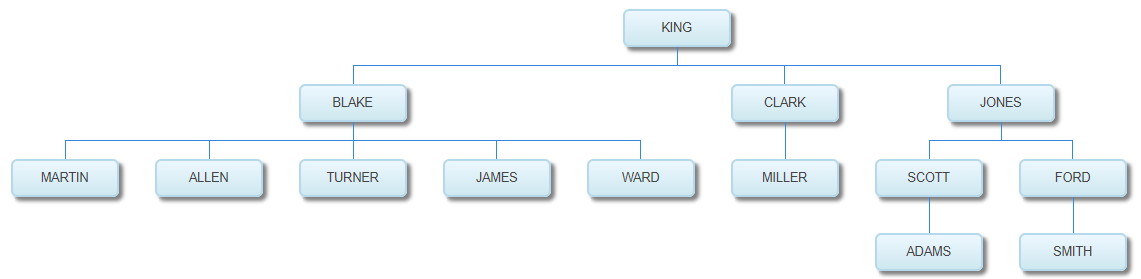

문제95. 부서위치, 부서위치별 토탈월급을 출력하시오 ~


In [9]:
# 세로로 출력
x <- merge( emp, dept, by="deptno", all=T )
aggregate( x$sal ~ x$loc, x, sum, na.action=na.pass )

# loc 값중에 BOSTON 값은 sal 이 NA 이여서 이를 나오게 하기위해서 a.action=na.pass 사용

x$loc,x$sal
<chr>,<int>
BOSTON,NA
CHICAGO,9400
DALLAS,10875
NEW YORK,8750


In [10]:
# 가로로 출력
x <- merge( emp, dept, by="deptno", all=T )
tapply( x$sal, x$loc, sum )

BOSTON  CHICAGO   DALLAS NEW YORK 
      NA     9400    10875     8750

문제96. 위의 가로로 출력한 결과를 막대 그래프로 시각화 하시오 !

BOSTON  CHICAGO   DALLAS NEW YORK 
      NA     9400    10875     8750

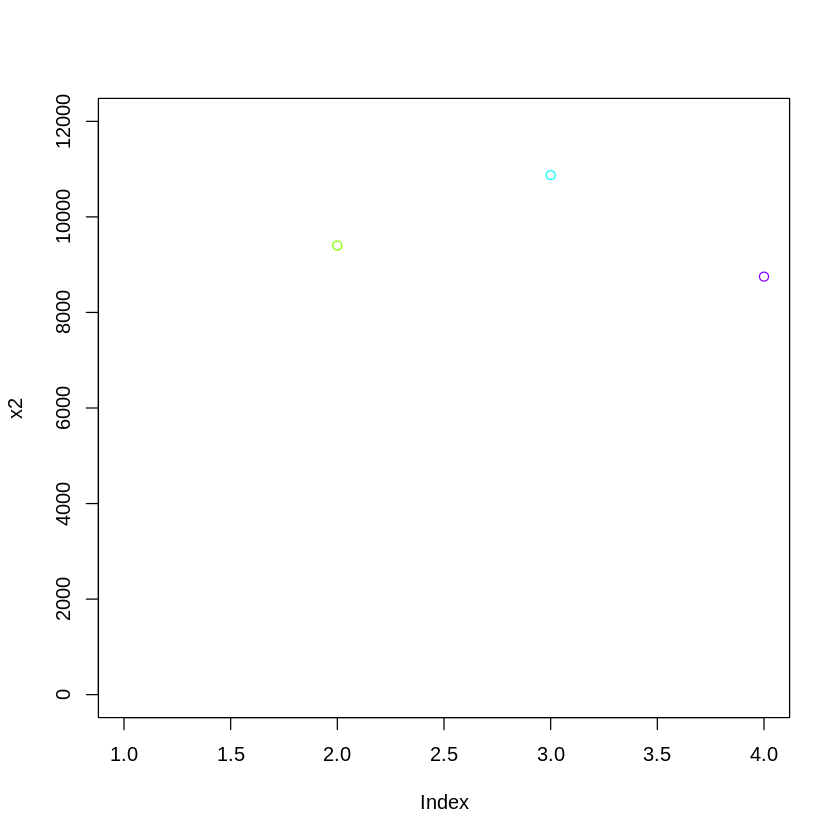

In [11]:
x <- merge( emp, dept, by="deptno", all=T )
x2 <- tapply( x$sal, x$loc, sum )
x2
plot( x2, col=rainbow(4), ylim=c(0, 12000) )

문제97. 아래와 같이 부서위치별 년도별 토탈월급을 출력하시오 !

              1980 1981 1982 1983
    BOSTON     NA   NA   NA   NA
    CHICAGO    NA 9400   NA   NA
    DALLAS     800 5975 3000 1100
    NEW YORK   NA 7450 1300   NA

In [19]:
x <- merge( emp, dept, by="deptno", all=T )
install.packages("lubridate")  # year 함수를 사용할 수 있는 패키지
library( lubridate )
year( emp$hiredate )     # hiredate 에서 연도만 추출

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:igraph’:

    %--%, union


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




[1] 1981 1981 1981 1981 1981 1981 1981 1981 1981 1981 1980 1982 1983 1982

In [20]:
x <- merge( emp, dept, by="deptno", all=T )
tapply( x$sal, list( x$loc, year(x$hiredate) ), sum )

,1980,1981,1982,1983
BOSTON,NA,NA,NA,NA
CHICAGO,NA,9400,NA,NA
DALLAS,800,5975,3000,1100
NEW YORK,NA,7450,1300,NA


문제98. 위의 결과를 다시 출력하는데 NA 대신에 0 으로 출력되게하시오 ! (연도를 행으로)


In [21]:
x <- merge( emp, dept, by="deptno", all=T )
x2 <- tapply( x$sal, list( year(x$hiredate), x$loc ), sum )
x2 [ is.na(x2) ] <- 0
x2

,BOSTON,CHICAGO,DALLAS,NEW YORK
1980,0,0,800,0
1981,0,9400,5975,7450
1982,0,0,3000,1300
1983,0,0,1100,0


문제99. 위의 결과를 막대 그래프로 시각화 하시오 !

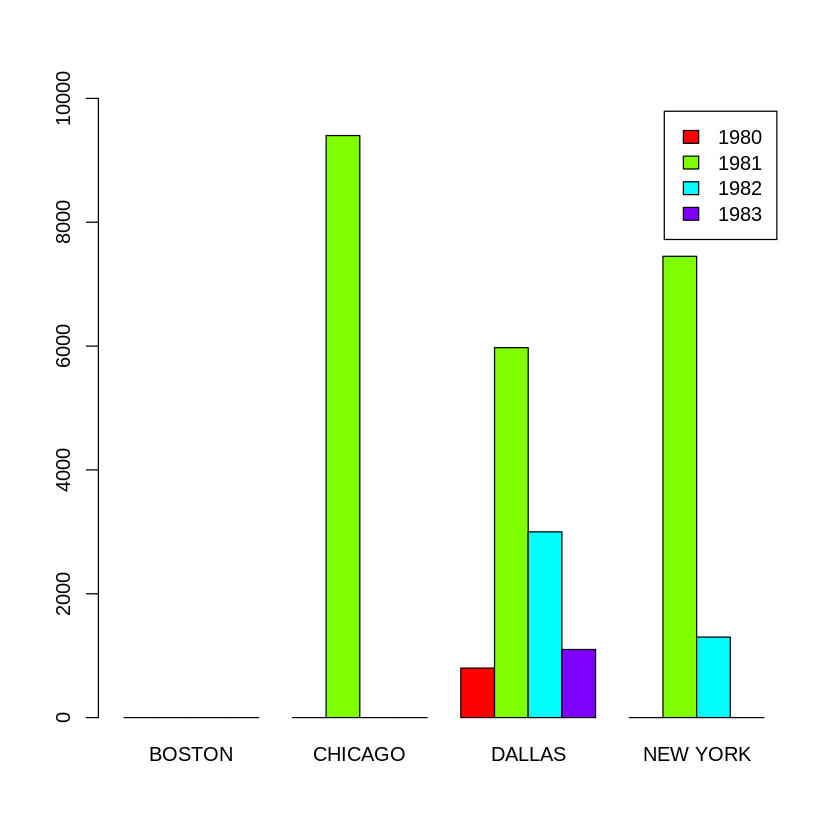

In [22]:
x <- merge( emp, dept, by="deptno", all=T )
x2 <- tapply( x$sal, list( year(x$hiredate), x$loc ), sum )
x2 [ is.na(x2) ] <- 0
barplot( x2, col=rainbow(4), beside=T, legend=rownames(x2), ylim=c(0, 10000) )

문제100. 지하철 1-4호선 승하차 승객수.csv 를 R 로 로드해서 line 이라는 이름으로 데이터 프레임을 생성하시오 ! 

In [24]:
line <- read.csv("1-4호선승하차승객수.csv", header=T)
head(line)

,line_no,time,in.,out
,<chr>,<int>,<int>,<int>
1,line_1,506,88136,35394
2,line_1,607,114628,195028
3,line_1,708,259282,483162
4,line_1,809,384892,1165703
5,line_1,910,315797,791704
6,line_1,1011,340972,585759


설명:

    lin_no :  몇 호선인지 (1~4호선)
    time   :  시간
    in     :  승치 인원수
    out    :  하차 인원수


문제101. 위의 line 에서 line_no 를 중복제거해서 출력하시오 !

In [25]:
line <- read.csv("1-4호선승하차승객수.csv", header=T)
unique(line$line_no)

[1] "line_1" "line_2" "line_3" "line_4"

문제102. 위의 지하철 승하차수 정보를 가지고 구글 모션차트를 그리시오 !

In [26]:
line <- read.csv("1-4호선승하차승객수.csv", header=T)
t1 <- gvisMotionChart( line, idvar="line_no", timevar="time")
plot(t1)

설명: google flash 중단으로 결제를 해야하므로 할 수 없습니다.


문제103. 부서번호, 부서번호별 토탈월급을 출력하는데 아래의 SQL 처럼 전체 토탈월급이 출력되게하시오 !

SQL>

    select deptno, sum(sal)
       from emp
       group by rollup(deptno);

R>

In [27]:
rbind( aggregate(sal~deptno, emp, sum), c(" ", sum(emp$sal) ) )

deptno,sal
<chr>,<chr>
10,8750
20,10875
30,9400
,29025


설명: rbind 는 두개의 결과를 위아래로 출력하고 싶을 때 사용하는 함수  
	cbind 는 두개의 결과를 양옆으로 출력하고 싶을때 사용하는 함수

문제104. cbind 를 사용해서 아래의 두개의 결과를 하나로 출력하시오 !

    aggregate( sal~deptno, emp, sum )
    aggregate( sal~deptno, emp, mean )


In [28]:
cbind( aggregate( sal~deptno, emp, sum ), aggregate( sal~deptno, emp, mean ) )

deptno,sal,deptno,sal
<int>,<int>,<int>,<dbl>
10,8750,10,2916.667
20,10875,20,2175.000
30,9400,30,1566.667


In [29]:
cbind( aggregate( sal~deptno, emp, sum ), aggregate( sal~deptno, emp, mean )$sal )

deptno,sal,"aggregate(sal ~ deptno, emp, mean)$sal"
<int>,<int>,<dbl>
10,8750,2916.667
20,10875,2175.000
30,9400,1566.667


문제105. 위의 결과의 컬럼명을 아래와 같이 출력되게하시오 !

        부서번호 토탈월급 평균월급
    1       10     8750    2916.667
    2       20    10875    2175.000
    3       30     9400    1566.667


In [30]:
x <- cbind( aggregate( sal~deptno, emp, sum ), aggregate( sal~deptno, emp, mean )$sal )
names(x) <- c("부서번호", "토탈월급", "평균월급")
x

부서번호,토탈월급,평균월급
<int>,<int>,<dbl>
10,8750,2916.667
20,10875,2175.000
30,9400,1566.667


문제106. 아래의 SQL 의 결과를 R 로 구현하시오 !

SQL>

    select job, sum(sal) as 토탈월급,
                  max(sal) as 최대월급,
                  min(sal) as 최소월급,
                  avg(sal) as 평균월급,
                  count(*) as 인원수
       from emp
       group by job;

R>

In [34]:
a <- aggregate( sal~job, emp, sum )
b <- aggregate( sal~job, emp, max )
c <- aggregate( sal~job, emp, min )
d <- aggregate( sal~job, emp, mean )
e <- aggregate( sal~job, emp, length )
x <- cbind(a, b$sal, c$sal, d$sal, e$sal)
names(x) <- c("직업", "토탈월급", "최대월급", "최소월급", "평균월급", "인원수")
x

직업,토탈월급,최대월급,최소월급,평균월급,인원수
<chr>,<int>,<int>,<int>,<dbl>,<int>
ANALYST,6000,3000,3000,3000.000,2
CLERK,4150,1300,800,1037.500,4
MANAGER,8275,2975,2450,2758.333,3
PRESIDENT,5000,5000,5000,5000.000,1
SALESMAN,5600,1600,1250,1400.000,4
